**Group 10:** Hamza Siddiqui, Hridyansh Gupta, Maher Thakkar, Manas M Bhat and Parika Rawat

**Course:** BUDT704

**Section:** 0502

**Date:** 5th December 2022 

# Trafickers - Traffic violation analysis

**Traffic violations**, either minor or major are considered as serious offenses likely to endanger the lives of the both drivers and pedestrians. You may unknowingly or intentionally commit a variety of infractions, misdemeanors, and felonies while you are behind the wheel. There are several factors accounting for traffic violations but one of the most serious crimes that one can commit while driving is mainly under the influence of alcohol or drugs. According to the digital journal, speeding is the most common driving violation as it accounts for 60% of all the traffic violations.

In the US, out of 329M population, there are 238M licensed drivers yet 112,000 fines are issued for traffic violation each day. This is a "Trafickers - Traffic violation" Analysis report that covers analysis on various criterion and is focused on the traffic violations that happened in Maryland between 2012 to 2018. Here, we have used the data exported from Kaggle.com which was collected by the US government. It consists of 1 million observations explored under numerous measures such as specific date and time the violation happened, which agency issued the violation, the description of the specific violation, geographic coordinate (longitude and latitude), whether involved an accident, the state of vehicle plate, drivers’ living address (street, city, and state), the race and gender of driver, etc. As we make headway, we will process and analyze this dataset to evaluate each parameter, determine certain trends and examine the following questions:
     
    ● ?
    ● Do out-of-state drivers cause more traffic violations than in-state drivers?
    ● Who are the worst drivers based on race and gender? and according to the highest gender see how many are of the highest race found?
    ● Location wise violations (Which area in the city has the most major offense which were life-threatening?)
    ● Predicting for a given set of vehicles will it cause an accident or not (using ML).

This analysis will assist in detecting traffic flow issues and ensuring the safety of drivers, pedestrians, and other road users.

Before we proceed with the data cleaning tasks, let's look at the project timeline until 10th november

In [1]:
import pandas as pd
#Display all rows
pd.set_option('display.max_rows', None)
project_progress = pd.DataFrame({'Task':['Define the project\'s goal and scope', 'Dataset Discussion and Exploration','Data Acquisition','Framing Research Questions','Project Proposal Preparation','Reviewing Project Overview','Updating the Research Questions','Updating the Milestone','Data Preparation','Data Cleaning - Vehicle Data','Data Cleaning - State Data','Data Cleaning - Driver Data','Data Cleaning - Location Data','Data Cleaning - Violation Timestamp Data','Identifying Outliers','Transforming Data','Data Profiling'],
                                 'Task Lead':['Parika', 'Bingqi','Hridyansh', 'Manas', 'Hamza','Hridyansh', 'Parika', 'Maher', 'Manas', 'Manas', 'Hridyansh', 'Maher', 'Hamza', 'Bingqi --> Maher (Reassinged)', 'Hamza', 'Bingqi --> Manas (Reassigned)', 'Parika' ],
                                 'Due Date':['10/12/2022', '10/12/2022', '10/12/2022', '10/13/2022', '10/14/2022', '10/20/2022', '10/25/2022','10/25/2022','10/25/2022','10/26/2022','10/27/2022','10/28/2022','10/31/2022','11/02/2022','11/05/2022','11/08/2022','11/10/2022' ],
                                 'Status': ['Completed', 'Completed', 'Completed', 'Completed', 'Completed', 'Completed','Completed','Completed','Completed', 'In-Progress','Completed','Completed','Completed','In-Progress','Completed','Yet to Begin','In-Progress']})
project_progress.set_index('Task')

Task Lead  \
Task                                                                      
Define the project's goal and scope                              Parika   
Dataset Discussion and Exploration                               Bingqi   
Data Acquisition                                              Hridyansh   
Framing Research Questions                                        Manas   
Project Proposal Preparation                                      Hamza   
Reviewing Project Overview                                    Hridyansh   
Updating the Research Questions                                  Parika   
Updating the Milestone                                            Maher   
Data Preparation                                                  Manas   
Data Cleaning - Vehicle Data                                      Manas   
Data Cleaning - State Data                                    Hridyansh   
Data Cleaning - Driver Data                                       Maher   
Data Cleaning - Location Data                                     Hamza   
Data Cleaning - Violation Timestamp Data  Bingqi --> Maher (Reassinged)   
Identifying Outliers                                              Hamza   
Transforming Data                         Bingqi --> Manas (Reassigned)   
Data Profiling                                                   Parika   

                                            Due Date        Status  
Task                                                                
Define the project's goal and scope       10/12/2022     Completed  
Dataset Discussion and Exploration        10/12/2022     Completed  
Data Acquisition                          10/12/2022     Completed  
Framing Research Questions                10/13/2022     Completed  
Project Proposal Preparation              10/14/2022     Completed  
Reviewing Project Overview                10/20/2022     Completed  
Updating the Research Questions           10/25/2022     Completed  
Updating the Milestone                    10/25/2022     Completed  
Data Preparation                          10/25/2022     Completed  
Data Cleaning - Vehicle Data              10/26/2022   In-Progress  
Data Cleaning - State Data                10/27/2022     Completed  
Data Cleaning - Driver Data               10/28/2022     Completed  
Data Cleaning - Location Data             10/31/2022     Completed  
Data Cleaning - Violation Timestamp Data  11/02/2022   In-Progress  
Identifying Outliers                      11/05/2022     Completed  
Transforming Data                         11/08/2022  Yet to Begin  
Data Profiling                            11/10/2022   In-Progress

From the above result, we can see that there are still few tasks that are 'In-Progress' and 'Yet to Begin' statuses. And, we feel that this is mainly because of the following reasons: 
1. **Resource Dependency** - We were a team of 6 but we found out that Bingqi is no longer a part of our group project quite late
2. **Task Dependency** - There are few tasks which are dependent on the previous tasks which are either 'In-Progress' or 'Yet to Begin'
3. **Lack of Knowledge** - We had assigned few tasks to the team before the time we were familiar with those topics. So it took us longer to work on it than what was expected
4. **Lack of Time** - We were unable to begin few tasks on time as we were caught up with assignments, exams and quizes

Although we have completed 76.47% of our work, there's still quite left out and we will cover up those portions by working extra hours this weekened.

Futhermore, we will have to delve deeper into the concepts of *data visualization* in order to proceed further with the next steps. Since the purpose of data visualization is to convey a story and give insights to make business decisions, we are in the process of identifying which plots will best represent our analysis

For our analysis, We have identified a Traffic Violation dataset from Kaggle(https://www.kaggle.com/datasets/rounak041993/traffic-violations-in-maryland-county), from which we will be cleaning, analyzing and deriving insights in order to come up with useful conclusions

In [2]:
#Import the python libraries needed to run the code
import numpy as np
from numpy import nan as NA
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.graph_objects as go
import folium
from folium import plugins
from folium.plugins import HeatMap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
#Set options to avoid displaying warnings while slicing dataframe
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 10)

In [3]:
#Import the data and display the first few rows of observation
traffic_violation_df = pd.read_csv('Traffic_Violation.csv')
traffic_violation_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6076\403433003.py:2: DtypeWarning: Columns (19,20,21,22,23,24,25,34) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_violation_df = pd.read_csv('Traffic_Violation.csv')


SeqID Date Of Stop Time Of Stop Agency  \
0  fbc324ab-bc8d-4743-ba23-7f9f370005e1   08/11/2019     20:02:00    MCP   
1  a6d904ec-d666-4bc3-8984-f37a4b31854d   08/12/2019     13:41:00    MCP   
2  54a64f6a-df28-4b65-a335-08883866aa46   08/12/2019     21:00:00    MCP   
3  cf5479b6-9bc7-4216-a7b2-99e57ae932af   08/12/2019     21:43:00    MCP   
4  5601ca35-8ee7-4f8e-9208-d89cde96d469   08/12/2019     21:30:00    MCP   

                  SubAgency  \
0    2nd District, Bethesda   
1    2nd District, Bethesda   
2  5th District, Germantown   
3  5th District, Germantown   
4    2nd District, Bethesda   

                                         Description  \
0  LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...   
1  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...   
2  DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...   
3  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
4  FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   

                      Location   Latitude  Longitude Accident  ...  \
0    CORDELL ST @ NORFOLK AVE.  38.989743 -77.097770       No  ...   
1     NBI270 AT MIDDLEBROOK RD  39.174110 -77.246170       No  ...   
2           MIDDLEBROOK AN 355  39.182015 -77.238221       No  ...   
3  GERMANTOWN RD AND ALE HOUSE  39.160508 -77.284023       No  ...   
4                EASTWEST/ 355  38.984247 -77.090548       No  ...   

       Charge                 Article Contributed To Accident   Race Gender  \
0  21-1101(a)  Transportation Article                   False  BLACK      M   
1    21-801.1  Transportation Article                   False  WHITE      M   
2     21-1129  Transportation Article                   False  BLACK      M   
3   13-401(h)  Transportation Article                   False  BLACK      M   
4   16-116(a)  Transportation Article                   False  BLACK      M   

     Driver City Driver State DL State        Arrest Type  \
0  SILVER SPRING           MD       MD  A - Marked Patrol   
1  SILVER SPRING           MD       MD  A - Marked Patrol   
2   GAITHERSBURG           MD       MD  A - Marked Patrol   
3     GERMANTOWN           MD       MD  A - Marked Patrol   
4  SILVER SPRING           MD       MD  A - Marked Patrol   

                             Geolocation  
0          (38.9897433333333, -77.09777)  
1                  (39.17411, -77.24617)  
2        (39.1820155, -77.2382213333333)  
3         (39.1605076666667, -77.284023)  
4  (38.9842466666667, -77.0905483333333)  

[5 rows x 43 columns]

The above dataset contains 43 columns. However, for our analysis, we do not need some of the variables, which can be excluded from our dataset. Further, to make it easier to understand the data, we reorder the columns in accordance to the analysis that we will be performing on this data.

In [4]:
#Retain only the columns needed for our analysis
traffic_violation_df = traffic_violation_df[['SeqID', 'Make', 'Model', 'VehicleType', 'Race', 'Accident','Fatal','Description', 'Gender', 'Date Of Stop','State', 'Year', 'Time Of Stop','Violation Type', 'DL State', 'Driver State', 'Personal Injury', 'Property Damage', 'Alcohol', 'Latitude', 'Longitude', 'Arrest Type']]
traffic_violation_df

SeqID    Make   Model  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1  TOYOTA   CAMRY   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d   HONDA   CIVIC   
2        54a64f6a-df28-4b65-a335-08883866aa46     KIA     SDN   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af  TOYOTA  SOLARA   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469  NISSAN  MAXIMA   
...                                       ...     ...     ...   
1811972  0387ad69-1ae3-4450-81cf-492daa90412d  TOYOTA   SCION   
1811973  f53a6954-40f6-4dc1-ba02-45508036a709   ACURA     TSX   
1811974  939e6ed6-a2bd-4b3d-9a53-5dce8d89df18    ACUR     MDX   
1811975  81a2aae1-a36b-43c7-b669-32ba8aced548     KIA    SOUL   
1811976  6011745b-48fa-41bd-97d0-e67493bb2722   HONDA   CIVIC   

             VehicleType      Race Accident Fatal  \
0        02 - Automobile     BLACK       No    No   
1        02 - Automobile     WHITE       No    No   
2        02 - Automobile     BLACK       No    No   
3        02 - Automobile     BLACK       No    No   
4        02 - Automobile     BLACK       No    No   
...                  ...       ...      ...   ...   
1811972  02 - Automobile  HISPANIC       No    No   
1811973  02 - Automobile     WHITE       No    No   
1811974  02 - Automobile     BLACK       No    No   
1811975  02 - Automobile     BLACK       No    No   
1811976  02 - Automobile     WHITE       No    No   

                                               Description Gender  \
0        LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...      M   
1        EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...      M   
2        DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...      M   
3        DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...      M   
4        FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...      M   
...                                                    ...    ...   
1811972  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...      M   
1811973  FAILURE TO EQUIP HWY. VEH. WITH REQUIRED LAMPS...      M   
1811974         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH      F   
1811975  FAILURE TO PROPERLY PLACE REGISTRATION PLATE O...      M   
1811976  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...      M   

        Date Of Stop  ... Time Of Stop  Violation Type DL State Driver State  \
0         08/11/2019  ...     20:02:00        Citation       MD           MD   
1         08/12/2019  ...     13:41:00        Citation       MD           MD   
2         08/12/2019  ...     21:00:00        Citation       MD           MD   
3         08/12/2019  ...     21:43:00        Citation       MD           MD   
4         08/12/2019  ...     21:30:00        Citation       MD           MD   
...              ...  ...          ...             ...      ...          ...   
1811972   10/12/2022  ...     23:47:00         Warning       MD           MD   
1811973   10/12/2022  ...     17:07:00         Warning       MD           MD   
1811974   10/12/2022  ...     18:42:00         Warning       MD           MD   
1811975   10/13/2022  ...     19:06:00         Warning       MD           MD   
1811976   10/13/2022  ...     11:33:00        Citation       MD           MD   

        Personal Injury Property Damage Alcohol   Latitude  Longitude  \
0                    No              No      No  38.989743 -77.097770   
1                    No              No      No  39.174110 -77.246170   
2                    No              No      No  39.182015 -77.238221   
3                    No              No      No  39.160508 -77.284023   
4                    No              No      No  38.984247 -77.090548   
...                 ...             ...     ...        ...        ...   
1811972              No              No      No  39.082957 -77.077147   
1811973              No              No      No  39.090447 -77.049303   
1811974              No              No      No  39.236868 -77.260375   
1811975              No              No      No  39.080372 -76.950728   
1811976              No      

Moreover, each observation in our dataset contains an unique ID, which is the seqID. This column can be set as the index of our dataframe and can be used to identify individual rows. 

In [69]:
#Set an index for our data
traffic_violation_df.set_index('SeqID')

Make  \
SeqID                                          
fbc324ab-bc8d-4743-ba23-7f9f370005e1  TOYOTA   
a6d904ec-d666-4bc3-8984-f37a4b31854d   HONDA   
54a64f6a-df28-4b65-a335-08883866aa46     KIA   
cf5479b6-9bc7-4216-a7b2-99e57ae932af  TOYOTA   
5601ca35-8ee7-4f8e-9208-d89cde96d469  NISSAN   
...                                      ...   
0387ad69-1ae3-4450-81cf-492daa90412d  TOYOTA   
f53a6954-40f6-4dc1-ba02-45508036a709   ACURA   
939e6ed6-a2bd-4b3d-9a53-5dce8d89df18   ACURA   
81a2aae1-a36b-43c7-b669-32ba8aced548     KIA   
6011745b-48fa-41bd-97d0-e67493bb2722   HONDA   

                                       Model  \
SeqID                                          
fbc324ab-bc8d-4743-ba23-7f9f370005e1   CAMRY   
a6d904ec-d666-4bc3-8984-f37a4b31854d   CIVIC   
54a64f6a-df28-4b65-a335-08883866aa46     SDN   
cf5479b6-9bc7-4216-a7b2-99e57ae932af  SOLARA   
5601ca35-8ee7-4f8e-9208-d89cde96d469  MAXIMA   
...                                      ...   
0387ad69-1ae3-4450-81cf-492daa90412d   SCION   
f53a6954-40f6-4dc1-ba02-45508036a709     TSX   
939e6ed6-a2bd-4b3d-9a53-5dce8d89df18     MDX   
81a2aae1-a36b-43c7-b669-32ba8aced548    SOUL   
6011745b-48fa-41bd-97d0-e67493bb2722   CIVIC   

                                          VehicleType  \
SeqID                                                   
fbc324ab-bc8d-4743-ba23-7f9f370005e1  02 - Automobile   
a6d904ec-d666-4bc3-8984-f37a4b31854d  02 - Automobile   
54a64f6a-df28-4b65-a335-08883866aa46  02 - Automobile   
cf5479b6-9bc7-4216-a7b2-99e57ae932af  02 - Automobile   
5601ca35-8ee7-4f8e-9208-d89cde96d469  02 - Automobile   
...                                               ...   
0387ad69-1ae3-4450-81cf-492daa90412d  02 - Automobile   
f53a6954-40f6-4dc1-ba02-45508036a709  02 - Automobile   
939e6ed6-a2bd-4b3d-9a53-5dce8d89df18  02 - Automobile   
81a2aae1-a36b-43c7-b669-32ba8aced548  02 - Automobile   
6011745b-48fa-41bd-97d0-e67493bb2722  02 - Automobile   

                                          Race  \
SeqID                                            
fbc324ab-bc8d-4743-ba23-7f9f370005e1     BLACK   
a6d904ec-d666-4bc3-8984-f37a4b31854d     WHITE   
54a64f6a-df28-4b65-a335-08883866aa46     BLACK   
cf5479b6-9bc7-4216-a7b2-99e57ae932af     BLACK   
5601ca35-8ee7-4f8e-9208-d89cde96d469     BLACK   
...                                        ...   
0387ad69-1ae3-4450-81cf-492daa90412d  HISPANIC   
f53a6954-40f6-4dc1-ba02-45508036a709     WHITE   
939e6ed6-a2bd-4b3d-9a53-5dce8d89df18     BLACK   
81a2aae1-a36b-43c7-b669-32ba8aced548     BLACK   
6011745b-48fa-41bd-97d0-e67493bb2722     WHITE   

                                      Accident  \
SeqID                                            
fbc324ab-bc8d-4743-ba23-7f9f370005e1         0   
a6d904ec-d666-4bc3-8984-f37a4b31854d         0   
54a64f6a-df28-4b65-a335-08883866aa46         0   
cf5479b6-9bc7-4216-a7b2-99e57ae932af         0   
5601ca35-8ee7-4f8e-9208-d89cde96d469         0   
...                                        ...   
0387ad69-1ae3-4450-81cf-492daa90412d         0   
f53a6954-40f6-4dc1-ba02-45508036a709         0   
939e6ed6-a2bd-4b3d-9a53-5dce8d89df18         0   
81a2aae1-a36b-43c7-b669-32ba8aced548         0   
6011745b-48fa-41bd-97d0-e67493bb2722         0   

                                     Fatal  \
SeqID                                        
fbc324ab-bc8d-4743-ba23-7f9f370005e1    No   
a6d904ec-d666-4bc3-8984-f37a4b31854d    No   
54a64f6a-df28-4b65-a335-08883866aa46    No   
cf5479b6-9bc7-4216-a7b2-99e57ae932af    No   
5601ca35-8ee7-4f8e-9208-d89cde96d469    No   
...                                    ...   
0387ad69-1ae3-4450-81cf-492daa90412d    No   
f53a6954-40f6-4dc1-ba02-45508036a709    No   
939e6ed6-a2bd-4b3d-9a53-5dce8d89df18    No   
81a2aae1-a36b-43c7-b669-32ba8aced548    No   
6011745b-48fa-41bd-97d0-e67493bb2722    No   

                                                                            Description  \
SeqID                                                   

First, let us check how many rows of data we have. We can check the length of the dataframe to know this

In [6]:
#Determine the number of rows in our dataset
print('We have ' + str(len(traffic_violation_df))+' rows of data')

We have 1811977 rows of data


We now know that our dataset contains data of 1811977 different violations. We need to now check if every column has the same number of valid observations

In [7]:
#Calculate the number of rows for each variable which have a non-null value
traffic_violation_df.notnull().sum()

SeqID              1811977
Make               1811910
Model              1811765
VehicleType        1811977
Race               1811977
                    ...   
Property Damage    1811977
Alcohol            1811977
Latitude           1811977
Longitude          1811977
Arrest Type        1811977
Length: 22, dtype: int64

From the above data generated, we can see that out of the total number of data, i.e., 1811977, we see that only SeqID, VehicleType, Race, Gender, Date Of Stop, Time Of Stop, Latitude and Longitude have 1811977 rows of data without a null value. However, these fields may have values such as 'Missing' or 'NA', which is still considered as dirty data. To identify such values in the dataset, we need to explore each column individually.

We can explore the make of the cars involved in traffic violations by taking the count of each unique make

In [8]:
#Count the number of times each Vehicle make is involved in a violation
traffic_violation_df['Make'].value_counts()

TOYOTA      211188
HONDA       199886
FORD        166649
TOYT         99202
NISSAN       98115
             ...  
NEW              1
SABUA            1
EXPRESS          1
HYUNDAQI         1
JYUDAI           1
Name: Make, Length: 4457, dtype: int64

From the generated output, we can see that there are several misspells in our data such as 'TOYOTA' having been entered as 'TOYT' and 'HYUNDAI' as 'HYUNDAQI'. Although it is not possible to go through all the different brands(or misspells), we can generate a list of the top 60 brands based on the violation and then identify the names that have been misspelt

In [9]:
#Display a list of top 60 vehicle makes involved in a violation
traffic_violation_df['Make'].value_counts().head(60)

TOYOTA      211188
HONDA       199886
FORD        166649
TOYT         99202
NISSAN       98115
             ...  
MINI          3581
LINC          3443
SUZUKI        3107
BUIC          3030
INFINITY      2954
Name: Make, Length: 60, dtype: int64

Now that we know how many different brand names have been mis-spelt, we can go ahead and replace them with the actual brand name

In [10]:
#Replace the top few mis-spelt brand names
traffic_violation_df['Make'].replace(to_replace=['TOYT','TYOTA','T0YOTA','TOY0TA','T0Y0TA','TOYOT','TOYOY','TOYATA','TOYTA','TOYOA','TOYA','TPYOTA','TOYO','TOYOTAA','TOY'], value="TOYOTA", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['HOND','HINDA','HODNA', 'HYUNDA'], value="HONDA", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['NISS', 'NISSIAN'], value="NISSAN", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['CHEV', 'CHEVY', 'CHEVORLET'], value="CHEVROLET", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['HYUN','HYUNDAQI', 'HYUND'], value="HYUNDAI", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['MERC', 'MERZ', 'MERCEDES BENZ', 'MERCEDEZ', 'MER'], value="MERCEDES", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['VW', 'VOLKS', 'VOLK', 'VOLKSWAGON', 'VOLKSWAGAN'], value="VOLKSWAGEN", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['MAZD'], value="MAZDA", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['VOLV'], value="VOLVO", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['LEXS', 'LEXU', 'LEX'], value="LEXUS", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['SUBA'], value="SUBARU", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['CADI'], value="CADILLAC", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['MITS'], value="MITSUBISHI", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['INFI', 'INFINITY'], value="INFINITI", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['CHRY', 'CHRYS'], value="CHRYSLER", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['DODG'], value="DODGE", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['ACUR'], value="ACURA", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['PONT'], value="PONTIAC", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['LINC'], value="LINCOLN", inplace = True)
traffic_violation_df['Make'].replace(to_replace=['BUIC', 'BUIK'], value="BUICK", inplace = True)
traffic_violation_df['Make'].value_counts().head(10)

TOYOTA       318281
HONDA        267531
FORD         166649
NISSAN       138556
CHEVROLET    133656
HYUNDAI       62838
DODGE         59431
ACURA         55292
MERCEDES      53232
BMW           50442
Name: Make, dtype: int64

We can see a marginal increase in the number of brands being involved in traffic violations post cleaning this field, which would have otherwise been categorized as a different brand altoghether.

The car model on its own is not easy to interpret. Hence, it is recommended to replace the Model with a combination of Model with the car brand. However, we retain the make column so that we can also analyze based on the vehicle brand.

In [11]:
#Create a new column to store the details of each vehicle
traffic_violation_df['Vehicle Model'] = traffic_violation_df['Make'].astype(str) +" - "+ traffic_violation_df['Model']

SeqID    Make   Model  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1  TOYOTA   CAMRY   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d   HONDA   CIVIC   
2        54a64f6a-df28-4b65-a335-08883866aa46     KIA     SDN   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af  TOYOTA  SOLARA   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469  NISSAN  MAXIMA   
...                                       ...     ...     ...   
1811972  0387ad69-1ae3-4450-81cf-492daa90412d  TOYOTA   SCION   
1811973  f53a6954-40f6-4dc1-ba02-45508036a709   ACURA     TSX   
1811974  939e6ed6-a2bd-4b3d-9a53-5dce8d89df18   ACURA     MDX   
1811975  81a2aae1-a36b-43c7-b669-32ba8aced548     KIA    SOUL   
1811976  6011745b-48fa-41bd-97d0-e67493bb2722   HONDA   CIVIC   

             VehicleType      Race Accident Fatal  \
0        02 - Automobile     BLACK       No    No   
1        02 - Automobile     WHITE       No    No   
2        02 - Automobile     BLACK       No    No   
3        02 - Automobile     BLACK       No    No   
4        02 - Automobile     BLACK       No    No   
...                  ...       ...      ...   ...   
1811972  02 - Automobile  HISPANIC       No    No   
1811973  02 - Automobile     WHITE       No    No   
1811974  02 - Automobile     BLACK       No    No   
1811975  02 - Automobile     BLACK       No    No   
1811976  02 - Automobile     WHITE       No    No   

                                               Description Gender  \
0        LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...      M   
1        EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...      M   
2        DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...      M   
3        DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...      M   
4        FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...      M   
...                                                    ...    ...   
1811972  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...      M   
1811973  FAILURE TO EQUIP HWY. VEH. WITH REQUIRED LAMPS...      M   
1811974         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH      F   
1811975  FAILURE TO PROPERLY PLACE REGISTRATION PLATE O...      M   
1811976  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...      M   

        Date Of Stop  ... Violation Type  DL State Driver State  \
0         08/11/2019  ...       Citation        MD           MD   
1         08/12/2019  ...       Citation        MD           MD   
2         08/12/2019  ...       Citation        MD           MD   
3         08/12/2019  ...       Citation        MD           MD   
4         08/12/2019  ...       Citation        MD           MD   
...              ...  ...            ...       ...          ...   
1811972   10/12/2022  ...        Warning        MD           MD   
1811973   10/12/2022  ...        Warning        MD           MD   
1811974   10/12/2022  ...        Warning        MD           MD   
1811975   10/13/2022  ...        Warning        MD           MD   
1811976   10/13/2022  ...       Citation        MD           MD   

        Personal Injury Property Damage Alcohol   Latitude  Longitude  \
0                    No              No      No  38.989743 -77.097770   
1                    No              No      No  39.174110 -77.246170   
2                    No              No      No  39.182015 -77.238221   
3                    No              No      No  39.160508 -77.284023   
4                    No              No      No  38.984247 -77.090548   
...                 ...             ...     ...        ...        ...   
1811972              No              No      No  39.082957 -77.077147   
1811973              No              No      No  39.090447 -77.049303   
1811974              No              No      No  39.236868 -77.260375   
1811975              No              No      No  39.080372 -76.950728   
1811976              No              No      No  39.109596 -77.075436   

                 Arrest Type    Vehicle Model  
0          A - Marked Patrol   TOYOTA - CAMRY  
1          A - 

In order to analyze the vehicles that are involved in most traffic violations, we can also explore the 'VehicleType' column. We can begin to do so by taking the count of each unique type of vehicle in this field. 

In [12]:
#Count the number of times each Vehicle type is involved in a violation and display as many rows as the number of values
pd.set_option('display.max_rows', len(traffic_violation_df['VehicleType'].value_counts()))
traffic_violation_df['VehicleType'].value_counts()

02 - Automobile              1600629
05 - Light Duty Truck          96043
28 - Other                     32996
03 - Station Wagon             26354
01 - Motorcycle                16178
06 - Heavy Duty Truck          14999
29 - Unknown                   10782
08 - Recreational Vehicle       5255
25 - Utility Trailer            1815
19 - Moped                      1756
07 - Truck/Road Tractor         1676
20 - Commercial Rig              956
04 - Limousine                   924
10 - Transit Bus                 604
12 - School Bus                  354
27 - Farm Equipment              133
09 - Farm Vehicle                107
26 - Boat Trailer                101
21 - Tandem Trailer               85
11 - Cross Country Bus            60
23 - Travel/Home Trailer          32
22 - Mobile Home                  27
24 - Camper                       26
14 - Ambulance(Non-Emerg)         20
18 - Police(Non-Emerg)            19
13 - Ambulance(Emerg)             14
15 - Fire(Emerg)                  13
1

The Vehicle type have been coded with a number along with the type. While we can see some vehicle types are listed multiple times, the code associated with them are different. These vehicle types can be clubbed together. Also, there exists vehicle type other and unknown. We cannot club these together since 

In order to analyze the genders and race that are involved in most traffic violations, we can also explore the 'Race' and 'Gender' column. We can begin to do so by checking the count of each unique type of vehicle in these fields. 

In [13]:
#Calculate the count of each Race in our dataset
traffic_violation_df['Race'].value_counts()

WHITE              622462
BLACK              576774
HISPANIC           398309
OTHER              107749
ASIAN              103366
NATIVE AMERICAN      3317
Name: Race, dtype: int64

There is a racial group known as 'Other.' All the other racial groupings are accurately displayed and identified. This column does not need to be cleaned because there are no NAN values and all rows in this column are properly identifiable.

In [14]:
#Calculate the count of each Gender in our dataset
traffic_violation_df['Gender'].value_counts()

M    1218321
F     590975
U       2681
Name: Gender, dtype: int64

To clean the columsn containing driving license state, we may change the number of rows displayed by python in order to view multiple rows at the same time.

In [15]:
#Expanding the output display to see the entire data of columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

We shall begin exploring this column by viewing the number of unique States and counting each unique State where a traffic violator's driving licence was issued.

In [16]:
# Finding the total number of unique DL State names
num_dl_states = traffic_violation_df['DL State'].nunique()
print(f'The total number of states in DL State column: {num_dl_states}')

#Displaying the count of each DL state
traffic_violation_df['DL State'].value_counts()

The total number of states in DL State column: 71


MD    1576139
DC      60868
VA      59940
XX      25827
PA      10924
FL      10145
NY       8118
NC       6112
CA       5922
TX       4699
WV       4116
GA       4005
NJ       3844
MA       2768
OH       2275
DE       1966
IL       1959
SC       1795
WA       1431
MI       1368
AZ       1288
CT       1270
TN       1223
CO       1213
US        842
IN        768
AL        714
MO        698
LA        672
WI        481
MN        475
MS        455
NV        439
NM        426
KY        408
ME        406
OK        387
UT        382
RI        371
OR        338
NH        311
KS        294
VI        293
HI        271
IA        262
ON        240
AK        225
AR        215
ND        193
MT        175
ID        163
NE        155
VT        155
PR        123
MB        102
IT         74
SD         66
AB         44
WY         42
NB         34
QC         33
SK         26
BC         17
GU         16
PE         12
AS          9
NS          7
PQ          6
MH          5
NF          2
YT          1
Name: 

We see in the 'DL State' column that there are 70 different States and it contains several wrong state name abbreviations such as 'AB','BC','IT', 'MB','MH','NB','NF','NS','ON','PE','PQ','QC','SK','US' and 'XX'.
Now we have 2 options:<br>
(a) To replace the incorrect state abbreviations with the valid ones.<br>
(b) To replace the incorrect state abbreviations with 'XX'.<br>

However, we'll proceed with option(b) beacuse we have no basis to predict which incorrect abbreviation corresponds to valid abbreviation. For example: 'AB' is an incorrect abbreviation and if we were to replace it with a valid abbreviation, we wouldn't know which valid abbreviation to choose from : 'AK', 'AL', 'AR', 'AS' or 'AZ'.

Also, there are many valid abbeviations starting with the same letter so we cannot replace the invalid abbreviation with a valid abbreviation.

Thus, we choose to replace the incorrect state abbreviations with 'XX'.

Source: https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html to get valid state name abbreviations

Now that we know how many different state abbreviations have been mis-spelt in DL State column, we can go ahead and replace them with 'XX'

In [17]:
#Replace mis-spelt state names with XX
traffic_violation_df['DL State'].replace(to_replace=['AB','BC','IT', 'MB','MH','NB','NF','NS','ON','PE','PQ','QC','SK','US'], value="XX", inplace = True)

We can count the number of states post replacement to verify if there is a reduction in the number.

In [18]:
# Finding the total number of unique DL State names
valid_num_dl_states = traffic_violation_df['DL State'].nunique()
print(f'The total number of valid states in DL State column: {valid_num_dl_states}')

The total number of valid states in DL State column: 57


Therefore, after cleaning the 'DL State' column,  we get 56 valid state names including 'XX'

Similarily, we can also replace the invalid state names with 'XX' for the column 'Driver state' in order to clean this column

In [19]:
#Replace mis-spelt state names with XX
traffic_violation_df['Driver State'].replace(to_replace=['AB','BC','IT', 'MB','NB','NF','NS','ON','PE','PQ','QC','SK','US'], value="XX", inplace = True)

#Displaying the count of each Driver state
traffic_violation_df['Driver State'].value_counts().sort_index(ascending=True)

AK        103
AL        500
AR        136
AZ        581
CA       3353
CO        680
CT        896
DC      59933
DE       1628
FL       6320
GA       2486
GU          7
HI        139
IA        108
ID         76
IL       1204
IN        564
KS        165
KY        291
LA        414
MA       1808
MD    1635281
ME        236
MI        864
MN        281
MO        433
MS        322
MT         88
NC       4268
ND        145
NE         94
NH        200
NJ       2842
NM        285
NV        265
NY       5592
OH       1591
OK        270
OR        182
PA       9202
PR         34
RI        232
SC       1122
SD         41
TN        730
TX       2724
UT        224
VA      56366
VI          8
VT        104
WA        867
WI        290
WV       3956
WY         35
XX       1400
Name: Driver State, dtype: int64

From the above generated list, we can observe that the state names have been cleaned and the only invalid state is 'XX', which we shall retain for our analysis

Latitude and Longitude are geographical coordinates on the Earth. Latitude is based off the distance from the North and South pole and represents a vertical coordinate while longitude is based on the Prime Meridian as its standard 0. Both Latitude and Longitude are both represented in degrees from their respective markers. In this data set, the latitude and longitude are used to put the coordinates for every traffic violation recorded. 

The data for latitude and longitude does have some cleaning to do as some of the latitudes and longitudes fall outside the range of coordinates that are in the state of Maryland. Since we cannot interpret locations in order to impute data, we need to filter out the bad data points by dropping them. In this case, we classify valid coordinates that have latitudes between 37 degrees and 40 degrees. For longitude, we classified valid coordinates as between -82 degrees and -75 degrees. This ranges are based on research done at https://www.mapsofworld.com/usa/states/maryland/lat-long.html which shows data for latitude and longitude of major cities and locations in Maryland. 

There are also instances of NaN values for latitude and longitude  which means there is missing data. Again, since we cannot assume to inpute any data into these columns, the only solution is to either drop them or leave them. Since the number of NaNs is negligble compared to the rest of the data at about 7.9%, we decided to drop them as well which was all done in one step per column. 


In [20]:
#Set the number of rows to be displayed back to default(10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 10)

#Checking latitude data for ranges outside of MD
lattitude_ = traffic_violation_df['Latitude'].astype(float)

#Filtering out the Latitude datapoints that do not fall within Marylands range
traffic_violation_df= traffic_violation_df[(traffic_violation_df['Latitude']>37) & (traffic_violation_df['Latitude']<40)]

In [21]:
#Checking Longitutde data for ranges outside of MD
longitude_ = traffic_violation_df['Longitude'].astype(float)
check3 = longitude_ < -82
traffic_violation_df.loc[check3]

SeqID  \
251778   71845112-8fe1-4fd4-b516-d4ddcb74daad   
252795   9333bd61-6ff4-4611-a0ee-e378328eff5b   
253137   9333bd61-6ff4-4611-a0ee-e378328eff5b   
253561   c9ec6067-1dc7-41f4-9c55-eae513ce0107   
254074   a5680417-a46e-44b2-9f64-43634b1021fd   
...                                       ...   
1373367  ea355881-c0ae-4dba-b883-c7b734282397   
1373368  9f75174f-d55f-40d7-ac05-2f7ae5b86981   
1373369  9f75174f-d55f-40d7-ac05-2f7ae5b86981   
1674821  d82d3e34-2258-4579-a139-1083bb860f88   
1674822  d82d3e34-2258-4579-a139-1083bb860f88   

             Make  \
251778        BMW   
252795     TOYOTA   
253137     TOYOTA   
253561   CHRYSLER   
254074      HONDA   
...           ...   
1373367    NISSAN   
1373368    NISSAN   
1373369    NISSAN   
1674821    NISSAN   
1674822    NISSAN   

          Model  \
251778       2D   
252795       4S   
253137       4S   
253561      200   
254074       TK   
...         ...   
1373367      TK   
1373368      TK   
1373369      TK   
1674821  ALTIMA   
1674822  ALTIMA   

                   VehicleType  \
251778         02 - Automobile   
252795         02 - Automobile   
253137         02 - Automobile   
253561         02 - Automobile   
254074   05 - Light Duty Truck   
...                        ...   
1373367  05 - Light Duty Truck   
1373368  05 - Light Duty Truck   
1373369  05 - Light Duty Truck   
1674821        02 - Automobile   
1674822        02 - Automobile   

          Race  \
251778   WHITE   
252795   BLACK   
253137   BLACK   
253561   WHITE   
254074   WHITE   
...        ...   
1373367  WHITE   
1373368  WHITE   
1373369  WHITE   
1674821  BLACK   
1674822  BLACK   

        Accident  \
251778        No   
252795        No   
253137        No   
253561        No   
254074        No   
...          ...   
1373367       No   
1373368       No   
1373369       No   
1674821       No   
1674822       No   

        Fatal  \
251778     No   
252795     No   
253137     No   
253561     No   
254074     No   
...       ...   
1373367    No   
1373368    No   
1373369    No   
1674821    No   
1674822    No   

                                               Description  \
251778   EXCEEDING MAXIMUM SPEED: 64 MPH IN A POSTED 35...   
252795   DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...   
253137   EXCEEDING MAXIMUM SPEED: 63 MPH IN A POSTED 35...   
253561   EXCEEDING MAXIMUM SPEED: 57 MPH IN A POSTED 35...   
254074   FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...   
...                                                    ...   
1373367  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...   
1373368  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
1373369  FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   
1674821                                     HEADLIGHTS (*)   
1674822                                          GLASS (*)   

        Gender  \
251778       M   
252795       M   
253137       M   
253561       M   
254074       F   
...        ...   
1373367      M   
1373368      M   
1373369      M   
1674821      M   
1674822      M   

        Date Of Stop  \
251778    02/03/2015   
252795    02/11/2015   
253137    02/11/2015   
253561    02/10/2015   
254074    02/03/2015   
...              ...   
1373367   03/16/2015   
1373368   03/16/2015   
1373369   03/16/2015   
1674821   03/02/2015   
1674822   03/02/2015   

         ...  \
251778   ...   
252795   ...   
253137   ...   
253561   ...   
254074   ...   
...      ...   
1373367  ...   
1373368  ...   
1373369  ...   
1674821  ...   
1674822  ...   

        Violation Type  \
251778        Citation   
252795        Citation   
253137        Citation   
253561        Citation   
254074        Citation   
...                ...   
1373367        Warning   
1373368        Warning   
1373369        Warning   
1674821          ESERO   
1674822          ESERO   

         DL State  \
251778         MD   
252795         MD   
253137         MD   
253561         MD   
254074         MD   
...           

In [22]:
#Filtering out Longitude datapoint that do not fall within Marylands range
traffic_violation_df = traffic_violation_df[(traffic_violation_df['Longitude'] > -82) & (traffic_violation_df['Longitude'] < -75)]
traffic_violation_df

SeqID  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d   
2        54a64f6a-df28-4b65-a335-08883866aa46   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469   
...                                       ...   
1811972  0387ad69-1ae3-4450-81cf-492daa90412d   
1811973  f53a6954-40f6-4dc1-ba02-45508036a709   
1811974  939e6ed6-a2bd-4b3d-9a53-5dce8d89df18   
1811975  81a2aae1-a36b-43c7-b669-32ba8aced548   
1811976  6011745b-48fa-41bd-97d0-e67493bb2722   

           Make  \
0        TOYOTA   
1         HONDA   
2           KIA   
3        TOYOTA   
4        NISSAN   
...         ...   
1811972  TOYOTA   
1811973   ACURA   
1811974   ACURA   
1811975     KIA   
1811976   HONDA   

          Model  \
0         CAMRY   
1         CIVIC   
2           SDN   
3        SOLARA   
4        MAXIMA   
...         ...   
1811972   SCION   
1811973     TSX   
1811974     MDX   
1811975    SOUL   
1811976   CIVIC   

             VehicleType  \
0        02 - Automobile   
1        02 - Automobile   
2        02 - Automobile   
3        02 - Automobile   
4        02 - Automobile   
...                  ...   
1811972  02 - Automobile   
1811973  02 - Automobile   
1811974  02 - Automobile   
1811975  02 - Automobile   
1811976  02 - Automobile   

             Race  \
0           BLACK   
1           WHITE   
2           BLACK   
3           BLACK   
4           BLACK   
...           ...   
1811972  HISPANIC   
1811973     WHITE   
1811974     BLACK   
1811975     BLACK   
1811976     WHITE   

        Accident  \
0             No   
1             No   
2             No   
3             No   
4             No   
...          ...   
1811972       No   
1811973       No   
1811974       No   
1811975       No   
1811976       No   

        Fatal  \
0          No   
1          No   
2          No   
3          No   
4          No   
...       ...   
1811972    No   
1811973    No   
1811974    No   
1811975    No   
1811976    No   

                                               Description  \
0        LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...   
1        EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...   
2        DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...   
3        DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
4        FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   
...                                                    ...   
1811972  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
1811973  FAILURE TO EQUIP HWY. VEH. WITH REQUIRED LAMPS...   
1811974         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH   
1811975  FAILURE TO PROPERLY PLACE REGISTRATION PLATE O...   
1811976  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...   

        Gender  \
0            M   
1            M   
2            M   
3            M   
4            M   
...        ...   
1811972      M   
1811973      M   
1811974      F   
1811975      M   
1811976      M   

        Date Of Stop  \
0         08/11/2019   
1         08/12/2019   
2         08/12/2019   
3         08/12/2019   
4         08/12/2019   
...              ...   
1811972   10/12/2022   
1811973   10/12/2022   
1811974   10/12/2022   
1811975   10/13/2022   
1811976   10/13/2022   

         ...  \
0        ...   
1        ...   
2        ...   
3        ...   
4        ...   
...      ...   
1811972  ...   
1811973  ...   
1811974  ...   
1811975  ...   
1811976  ...   

        Violation Type  \
0             Citation   
1             Citation   
2             Citation   
3             Citation   
4             Citation   
...                ...   
1811972        Warning   
1811973        Warning   
1811974        Warning   
1811975        Warning   
1811976       Citation   

         DL State  \
0              MD   
1              MD   
2              MD   
3              MD   
4              MD   
...           ...   
1811972        MD   
1811973        MD   
1811974    

In order to find if the days are safer than nights in terms of traffic violations, we need to create bins to classify the time as day or night. We consider 7 AM to 7 PM as day and the time period from 7 PM to 7 AM as night. Let us create a new column for this and have a categorical variable in it.

In [23]:
#Create bins for day and night and assign it to each row
bin_labels = ['Night', 'Day', 'Night']
traffic_violation_df['Violation time']=pd.cut(pd.to_datetime(traffic_violation_df['Time Of Stop']).dt.hour, bins=[0,7,18,24], labels=bin_labels, ordered=False)
traffic_violation_df

SeqID  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d   
2        54a64f6a-df28-4b65-a335-08883866aa46   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469   
...                                       ...   
1811972  0387ad69-1ae3-4450-81cf-492daa90412d   
1811973  f53a6954-40f6-4dc1-ba02-45508036a709   
1811974  939e6ed6-a2bd-4b3d-9a53-5dce8d89df18   
1811975  81a2aae1-a36b-43c7-b669-32ba8aced548   
1811976  6011745b-48fa-41bd-97d0-e67493bb2722   

           Make  \
0        TOYOTA   
1         HONDA   
2           KIA   
3        TOYOTA   
4        NISSAN   
...         ...   
1811972  TOYOTA   
1811973   ACURA   
1811974   ACURA   
1811975     KIA   
1811976   HONDA   

          Model  \
0         CAMRY   
1         CIVIC   
2           SDN   
3        SOLARA   
4        MAXIMA   
...         ...   
1811972   SCION   
1811973     TSX   
1811974     MDX   
1811975    SOUL   
1811976   CIVIC   

             VehicleType  \
0        02 - Automobile   
1        02 - Automobile   
2        02 - Automobile   
3        02 - Automobile   
4        02 - Automobile   
...                  ...   
1811972  02 - Automobile   
1811973  02 - Automobile   
1811974  02 - Automobile   
1811975  02 - Automobile   
1811976  02 - Automobile   

             Race  \
0           BLACK   
1           WHITE   
2           BLACK   
3           BLACK   
4           BLACK   
...           ...   
1811972  HISPANIC   
1811973     WHITE   
1811974     BLACK   
1811975     BLACK   
1811976     WHITE   

        Accident  \
0             No   
1             No   
2             No   
3             No   
4             No   
...          ...   
1811972       No   
1811973       No   
1811974       No   
1811975       No   
1811976       No   

        Fatal  \
0          No   
1          No   
2          No   
3          No   
4          No   
...       ...   
1811972    No   
1811973    No   
1811974    No   
1811975    No   
1811976    No   

                                               Description  \
0        LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...   
1        EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...   
2        DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...   
3        DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
4        FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   
...                                                    ...   
1811972  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
1811973  FAILURE TO EQUIP HWY. VEH. WITH REQUIRED LAMPS...   
1811974         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH   
1811975  FAILURE TO PROPERLY PLACE REGISTRATION PLATE O...   
1811976  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...   

        Gender  \
0            M   
1            M   
2            M   
3            M   
4            M   
...        ...   
1811972      M   
1811973      M   
1811974      F   
1811975      M   
1811976      M   

        Date Of Stop  \
0         08/11/2019   
1         08/12/2019   
2         08/12/2019   
3         08/12/2019   
4         08/12/2019   
...              ...   
1811972   10/12/2022   
1811973   10/12/2022   
1811974   10/12/2022   
1811975   10/13/2022   
1811976   10/13/2022   

         ...  \
0        ...   
1        ...   
2        ...   
3        ...   
4        ...   
...      ...   
1811972  ...   
1811973  ...   
1811974  ...   
1811975  ...   
1811976  ...   

        DL State  \
0             MD   
1             MD   
2             MD   
3             MD   
4             MD   
...          ...   
1811972       MD   
1811973       MD   
1811974       MD   
1811975       MD   
1811976       MD   

         Driver State  \
0                  MD   
1                  MD   
2                  MD   
3                  MD   
4                  MD   
...               ...   
1811972            MD   
1811973            MD   
1811974            MD   
1811975            MD 

By introducing a new column with just the month and year of the violation, we can perform time-series analysis on how the violations have improved or deteriorated with time.

In [24]:
#Create a new column and store the year and month of violation
traffic_violation_df['Violation_month'] = (pd.to_datetime(traffic_violation_df['Date Of Stop']).dt.strftime('%Y-%m'))
traffic_violation_df

SeqID  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d   
2        54a64f6a-df28-4b65-a335-08883866aa46   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469   
...                                       ...   
1811972  0387ad69-1ae3-4450-81cf-492daa90412d   
1811973  f53a6954-40f6-4dc1-ba02-45508036a709   
1811974  939e6ed6-a2bd-4b3d-9a53-5dce8d89df18   
1811975  81a2aae1-a36b-43c7-b669-32ba8aced548   
1811976  6011745b-48fa-41bd-97d0-e67493bb2722   

           Make  \
0        TOYOTA   
1         HONDA   
2           KIA   
3        TOYOTA   
4        NISSAN   
...         ...   
1811972  TOYOTA   
1811973   ACURA   
1811974   ACURA   
1811975     KIA   
1811976   HONDA   

          Model  \
0         CAMRY   
1         CIVIC   
2           SDN   
3        SOLARA   
4        MAXIMA   
...         ...   
1811972   SCION   
1811973     TSX   
1811974     MDX   
1811975    SOUL   
1811976   CIVIC   

             VehicleType  \
0        02 - Automobile   
1        02 - Automobile   
2        02 - Automobile   
3        02 - Automobile   
4        02 - Automobile   
...                  ...   
1811972  02 - Automobile   
1811973  02 - Automobile   
1811974  02 - Automobile   
1811975  02 - Automobile   
1811976  02 - Automobile   

             Race  \
0           BLACK   
1           WHITE   
2           BLACK   
3           BLACK   
4           BLACK   
...           ...   
1811972  HISPANIC   
1811973     WHITE   
1811974     BLACK   
1811975     BLACK   
1811976     WHITE   

        Accident  \
0             No   
1             No   
2             No   
3             No   
4             No   
...          ...   
1811972       No   
1811973       No   
1811974       No   
1811975       No   
1811976       No   

        Fatal  \
0          No   
1          No   
2          No   
3          No   
4          No   
...       ...   
1811972    No   
1811973    No   
1811974    No   
1811975    No   
1811976    No   

                                               Description  \
0        LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...   
1        EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...   
2        DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...   
3        DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
4        FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   
...                                                    ...   
1811972  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
1811973  FAILURE TO EQUIP HWY. VEH. WITH REQUIRED LAMPS...   
1811974         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH   
1811975  FAILURE TO PROPERLY PLACE REGISTRATION PLATE O...   
1811976  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...   

        Gender  \
0            M   
1            M   
2            M   
3            M   
4            M   
...        ...   
1811972      M   
1811973      M   
1811974      F   
1811975      M   
1811976      M   

        Date Of Stop  \
0         08/11/2019   
1         08/12/2019   
2         08/12/2019   
3         08/12/2019   
4         08/12/2019   
...              ...   
1811972   10/12/2022   
1811973   10/12/2022   
1811974   10/12/2022   
1811975   10/13/2022   
1811976   10/13/2022   

         ...  \
0        ...   
1        ...   
2        ...   
3        ...   
4        ...   
...      ...   
1811972  ...   
1811973  ...   
1811974  ...   
1811975  ...   
1811976  ...   

        Driver State  \
0                 MD   
1                 MD   
2                 MD   
3                 MD   
4                 MD   
...              ...   
1811972           MD   
1811973           MD   
1811974           MD   
1811975           MD   
1811976           MD   

         Personal Injury  \
0                     No   
1                     No   
2                     No   
3                     No   
4                     No   
...                  ...   
1811972               No   


Having a dummy variable instead of the text in categorical vaiables, such as 'Accident' would make it easier to calulate the total number. Hence, we replace all the values that are 'No' with a 0 and all the values that are 'Yes' with 1.

In [25]:
#Set categorical variables
not_accident = 0
is_accident = 1

#Assign categorical variables for each column.
traffic_violation_df['Accident']=traffic_violation_df['Accident'].map(lambda x: is_accident if x=='Yes' else not_accident)
traffic_violation_df

SeqID  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d   
2        54a64f6a-df28-4b65-a335-08883866aa46   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469   
...                                       ...   
1811972  0387ad69-1ae3-4450-81cf-492daa90412d   
1811973  f53a6954-40f6-4dc1-ba02-45508036a709   
1811974  939e6ed6-a2bd-4b3d-9a53-5dce8d89df18   
1811975  81a2aae1-a36b-43c7-b669-32ba8aced548   
1811976  6011745b-48fa-41bd-97d0-e67493bb2722   

           Make  \
0        TOYOTA   
1         HONDA   
2           KIA   
3        TOYOTA   
4        NISSAN   
...         ...   
1811972  TOYOTA   
1811973   ACURA   
1811974   ACURA   
1811975     KIA   
1811976   HONDA   

          Model  \
0         CAMRY   
1         CIVIC   
2           SDN   
3        SOLARA   
4        MAXIMA   
...         ...   
1811972   SCION   
1811973     TSX   
1811974     MDX   
1811975    SOUL   
1811976   CIVIC   

             VehicleType  \
0        02 - Automobile   
1        02 - Automobile   
2        02 - Automobile   
3        02 - Automobile   
4        02 - Automobile   
...                  ...   
1811972  02 - Automobile   
1811973  02 - Automobile   
1811974  02 - Automobile   
1811975  02 - Automobile   
1811976  02 - Automobile   

             Race  \
0           BLACK   
1           WHITE   
2           BLACK   
3           BLACK   
4           BLACK   
...           ...   
1811972  HISPANIC   
1811973     WHITE   
1811974     BLACK   
1811975     BLACK   
1811976     WHITE   

         Accident  \
0               0   
1               0   
2               0   
3               0   
4               0   
...           ...   
1811972         0   
1811973         0   
1811974         0   
1811975         0   
1811976         0   

        Fatal  \
0          No   
1          No   
2          No   
3          No   
4          No   
...       ...   
1811972    No   
1811973    No   
1811974    No   
1811975    No   
1811976    No   

                                               Description  \
0        LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...   
1        EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...   
2        DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...   
3        DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
4        FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   
...                                                    ...   
1811972  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
1811973  FAILURE TO EQUIP HWY. VEH. WITH REQUIRED LAMPS...   
1811974         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH   
1811975  FAILURE TO PROPERLY PLACE REGISTRATION PLATE O...   
1811976  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...   

        Gender  \
0            M   
1            M   
2            M   
3            M   
4            M   
...        ...   
1811972      M   
1811973      M   
1811974      F   
1811975      M   
1811976      M   

        Date Of Stop  \
0         08/11/2019   
1         08/12/2019   
2         08/12/2019   
3         08/12/2019   
4         08/12/2019   
...              ...   
1811972   10/12/2022   
1811973   10/12/2022   
1811974   10/12/2022   
1811975   10/13/2022   
1811976   10/13/2022   

         ...  \
0        ...   
1        ...   
2        ...   
3        ...   
4        ...   
...      ...   
1811972  ...   
1811973  ...   
1811974  ...   
1811975  ...   
1811976  ...   

        Driver State  \
0                 MD   
1                 MD   
2                 MD   
3                 MD   
4                 MD   
...              ...   
1811972           MD   
1811973           MD   
1811974           MD   
1811975           MD   
1811976           MD   

         Personal Injury  \
0                     No   
1                     No   
2                     No   
3                     No   
4                     No   
...                  ...   
1811972         

### ANALYSIS

Q1) Which Cities in the state of Maryland contribute to the most number of Accidents?

In [26]:
# Creating a new dataframe only containing 'Latitude' and 'Longitude' rows where an accident has occured('Accident'==1)
traffic_violation_df2 = traffic_violation_df
traffic_violation_df2['Longitude'] = traffic_violation_df[traffic_violation_df['Accident']==1]['Longitude']
traffic_violation_df2['Latitude'] = traffic_violation_df[traffic_violation_df['Accident']==1]['Latitude']

In [27]:
# Using folium to create a heat map and entering location coordinates of Maryland State
traffic_violation_df_map = folium.Map(location=[39.045753, -76.641273],
                    zoom_start = 13) 

# Need to convert all values in the columns into float
traffic_violation_df2['Latitude'] = traffic_violation_df2['Latitude'].astype(float)
traffic_violation_df2['Longitude'] = traffic_violation_df2['Longitude'].astype(float)

# Filtering the Dataframe for rows, then columns, then remove NaNs
heat_df = traffic_violation_df2[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# Using a list comprehension to make a list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plotting it on the map
HeatMap(heat_data,min_opacity=0.2).add_to(traffic_violation_df_map)

# Displaying the map
traffic_violation_df_map

Observations from the above visualization are as follows:
(i) Glenmont contributes to the maximum number of Accidents.

Q2) Is there any racial bias in Marylnds traffic police?

## Racial Bias Test

One question that came up while investigating the dataset was whether or not racial bias is shown in the number of traffic violations based on race. In order to test this theory, we focused on two columns ; the Arrest Type column and the Race column. First we cleaned the Arrest Type column by eliminating the unncessary letter codes for each type of arrest, then we put each arrest type into 2 groups; human stops and technology stops. We determined that the traffic violations were occuring by either an actual police or person of authority conducting the stops, or a camera/radar or some other form of technology recording the violations. 

For the human recorded violations, we determined that they were :

'Marked Patrol'
'Foot Patrol'
'Unmarked Patrol'
'Motorcycle'
'Marked (Off-Duty)'
'Mounted Patrol'
'Unmarked (Off-Duty)'

For the technology recorded violations, we determined that they were:

'Marked Laser'
'Marked Stationary Radar'
'License Plate Recognition'
 'Unmarked VASCAR'
 'Marked Moving Radar (Moving)'
 'Unmarked Moving Radar (Stationary)'
 'Marked Moving Radar (Stationary)'
 'Unmarked Stationary Radar'
 'Marked VASCAR'
 'Unmarked Moving Radar (Moving)'
 
 We also determined that 'Aircraft Assistance' was not one way or the other as the assitance implies that it is not the only thing working towards recording the violation.
 
 The reason to divide the violations into human and technology is to use technology as a base for comparison. Technology cannot have racial bias unless it is programmed into it which is highly doubtful as it has no place in traffic violations. So we hypthosesized that the ratio between non-white and white traffic violations from technology stops would be close to 1. 
 
 We also hypothesized that non-white races (being Hispanic, Black, Asian, and Native American) would be targeted more during traffic violations and thus yield a high ratio of non-white to white traffic violations from human recordings.  

In [28]:
#Check the unique arrest types in our dataset
traffic_violation_df['Arrest Type'].unique()

array(['A - Marked Patrol', 'L - Motorcycle', 'Q - Marked Laser',
       'I - Marked Moving Radar (Moving)', 'B - Unmarked Patrol',
       'F - Unmarked Stationary Radar', 'R - Unmarked Laser',
       'G - Marked Moving Radar (Stationary)',
       'E - Marked Stationary Radar', 'O - Foot Patrol',
       'H - Unmarked Moving Radar (Stationary)', 'M - Marked (Off-Duty)',
       'J - Unmarked Moving Radar (Moving)', 'N - Unmarked (Off-Duty)',
       'S - License Plate Recognition', 'C - Marked VASCAR',
       'P - Mounted Patrol', 'D - Unmarked VASCAR', 'K - Aircraft Assist'],
      dtype=object)

In [29]:
#Clean the data for letter codes and whitespace 
traffic_violation_df['Arrest Type']= traffic_violation_df['Arrest Type'].str.replace('(\D{1}\s\-\s)','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6076\378906410.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  traffic_violation_df['Arrest Type']= traffic_violation_df['Arrest Type'].str.replace('(\D{1}\s\-\s)','')


In [31]:
#Classify arrest types as human or tech 
human_check = ['Marked Patrol','Foot Patrol','Unmarked Patrol','Motorcycle','Marked (Off-Duty)','Mounted Patrol','Unmarked (Off-Duty)']
tech_check = ['Marked Laser','Marked Stationary Radar','Unmarked Laser','License Plate Recognition','Unmarked VASCAR','Marked Moving Radar (Moving)','Unmarked Stationary Radar','Marked VASCAR','Unmarked Moving Radar (Moving)']

In [32]:
#Create different dataframes for those checked by humans and tech
human_check_df = traffic_violation_df[traffic_violation_df['Arrest Type'].isin(human_check)]
tech_check_df = traffic_violation_df[traffic_violation_df['Arrest Type'].isin(tech_check)]

SeqID  \
0  fbc324ab-bc8d-4743-ba23-7f9f370005e1   
1  a6d904ec-d666-4bc3-8984-f37a4b31854d   
2  54a64f6a-df28-4b65-a335-08883866aa46   
3  cf5479b6-9bc7-4216-a7b2-99e57ae932af   
4  5601ca35-8ee7-4f8e-9208-d89cde96d469   

     Make  \
0  TOYOTA   
1   HONDA   
2     KIA   
3  TOYOTA   
4  NISSAN   

    Model  \
0   CAMRY   
1   CIVIC   
2     SDN   
3  SOLARA   
4  MAXIMA   

       VehicleType  \
0  02 - Automobile   
1  02 - Automobile   
2  02 - Automobile   
3  02 - Automobile   
4  02 - Automobile   

    Race  \
0  BLACK   
1  WHITE   
2  BLACK   
3  BLACK   
4  BLACK   

   Accident  \
0         0   
1         0   
2         0   
3         0   
4         0   

  Fatal  \
0    No   
1    No   
2    No   
3    No   
4    No   

                                         Description  \
0  LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...   
1  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...   
2  DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...   
3  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
4  FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   

  Gender  \
0      M   
1      M   
2      M   
3      M   
4      M   

  Date Of Stop  \
0   08/11/2019   
1   08/12/2019   
2   08/12/2019   
3   08/12/2019   
4   08/12/2019   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Driver State  \
0           MD   
1           MD   
2           MD   
3           MD   
4           MD   

   Personal Injury  \
0               No   
1               No   
2               No   
3               No   
4               No   

  Property Damage  \
0              No   
1              No   
2              No   
3              No   
4              No   

  Alcohol  \
0      No   
1      No   
2      No   
3      No   
4      No   

  Latitude  \
0      NaN   
1      NaN   
2      NaN   
3      NaN   
4      NaN   

  Longitude  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

     Arrest Type  \
0  Marked Patrol   
1  Marked Patrol   
2  Marked Patrol   
3  Marked Patrol   
4  Marked Patrol   

     Vehicle Model  \
0   TOYOTA - CAMRY   
1    HONDA - CIVIC   
2        KIA - SDN   
3  TOYOTA - SOLARA   
4  NISSAN - MAXIMA   

  Violation time  \
0          Night   
1            Day   
2          Night   
3          Night   
4          Night   

   Violation_month  
0          2019-08  
1          2019-08  
2          2019-08  
3          2019-08  
4          2019-08  

[5 rows x 25 columns]

In [34]:
#Display the unique races
traffic_violation_df.Race.unique()

array(['BLACK', 'WHITE', 'HISPANIC', 'OTHER', 'ASIAN', 'NATIVE AMERICAN'],
      dtype=object)

In [70]:
#Classify the non-white races and calculate the numbers of pullovers  
non_white_races = ['BLACK','HISPANIC','ASIAN','NATIVE AMERICAN']
print(f'Non white pullovers by tech {tech_check_df.Race.isin(non_white_races).sum()}')
print(f'Non white pullovers by human {human_check_df.Race.isin(non_white_races).sum()}')
print(f'White pullovers by tech {(tech_check_df.Race=="WHITE").sum()}')
print(f'White pullovers by human {(human_check_df.Race=="WHITE").sum()}')

Non white pullovers by tech 99640
Non white pullovers by human 901066
White pullovers by tech 89078
White pullovers by human 480048


In [36]:
#Calclate the ratio of pullovers for different races
non_white_tech = tech_check_df.Race.isin(non_white_races).sum()
non_white_human = human_check_df.Race.isin(non_white_races).sum()
white_tech = (tech_check_df.Race=="WHITE").sum()
white_human = (human_check_df.Race=="WHITE").sum()
tech_others_white_ratio = (non_white_tech/white_tech) 
human_others_white_ratio = (non_white_human/white_human)

In [37]:
#Display the ratio results
print(f'The ratio of non-white traffic violations to whites recorded by humans is {human_others_white_ratio:.2f} which is nearly 2:1.')
print(f'The ratio of non-white Traffic violations to whites recored by technology is {tech_others_white_ratio:.2f} which is nearly 1, making it even.')

The ratio of non-white traffic violations to whites recorded by humans is 1.88 which is nearly 2:1.


In [39]:
#Display the results in a tabular form
racial_bias_df = pd.DataFrame({'Arrest Type':['Tech','Tech', 'Human','Human'], 'Race':['White','Non-White','White','Non-White'],'Number of Violations': [white_tech,non_white_tech,white_human,non_white_human]}, index = [1,2,3,4])
racial_bias_df

Arrest Type  \
1        Tech   
2        Tech   
3       Human   
4       Human   

        Race  \
1      White   
2  Non-White   
3      White   
4  Non-White   

   Number of Violations  
1                 89078  
2                 99640  
3                480048  
4                901066

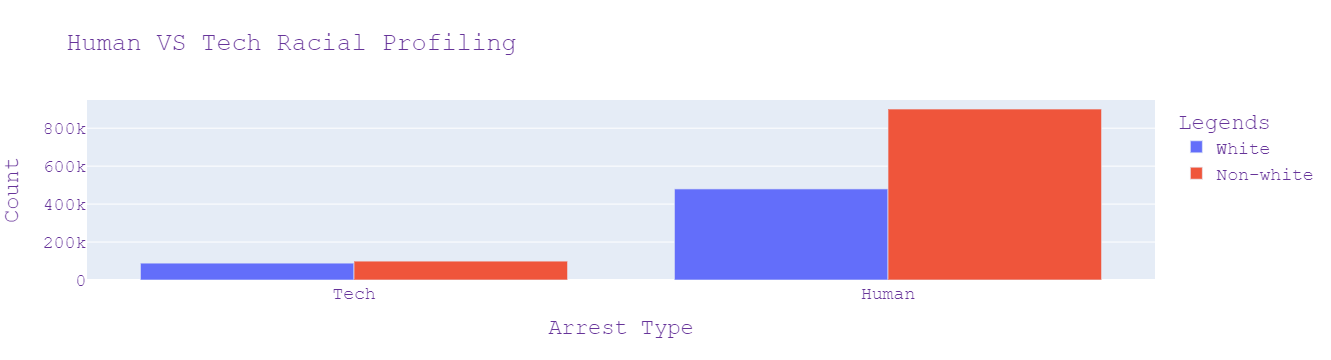

In [40]:
#Plot a graph of pullovers by tech and human for people of different races
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='White', x=racial_bias_df[racial_bias_df['Race'] == 'White']['Arrest Type'], y=racial_bias_df[racial_bias_df['Race'] == 'White']['Number of Violations']),
    go.Bar(name='Non-white', x=racial_bias_df[racial_bias_df['Race'] == 'Non-White']['Arrest Type'], y=racial_bias_df[racial_bias_df['Race'] == 'Non-White']['Number of Violations']),
])
fig.update_layout(
    title= "Human VS Tech Racial Profiling",
    xaxis_title="Arrest Type",
    yaxis_title="Count",
    legend_title="Legends",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))
fig.show()

Our results have found that the tech recording yielded a ratio of 0.98 white to non-white traffic violations which is on par with our hypothesis. The human recording showed a ratio of 1.7 which means it is almost 2:1 the ratio between non-white traffic violations and white traffic violations recorded by humans. This graph shows the difference in raw sums and as you can see, the tech arrest type yieleded nearly even results while the human recording was overwhelmingly less for whites compared to non-whites. Thus, we can conclude that there is racial bias in traffic violations in Maryland based on this dataset. 

We can infer that police officers in Maryland feel the need to stop non-white drivers rather than white drivers due to personal bias. We can't say that every traffic police officer in the area is 'racist' but we can infer clear bias from the group as a whole. 

*Analysis 2:* Does a reckless driver get a warning or a citation? and what's the warning rate between males and females
A reckless driver can be characterized by atleast one of the following events:
1. The driver was involved in an accident. 
2. The driver contributed to an accident. 
3. The driver damaged property with his/her vehicle. 
4. The driver was under the influence of alcohol.

In [41]:
#Set categorical variables
no = 0
yes = 1

#Assign categorical variables for each column.
traffic_violation_df['Personal Injury']=traffic_violation_df['Personal Injury'].map(lambda x: yes if x =='Yes' else no)
traffic_violation_df['Property Damage']=traffic_violation_df['Property Damage'].map(lambda x: yes if x =='Yes' else no)
traffic_violation_df['Alcohol']=traffic_violation_df['Alcohol'].map(lambda x: yes if x =='Yes' else no)

reckless_drivers_df = traffic_violation_df.loc[(traffic_violation_df['Accident'] == 1)  | (traffic_violation_df['Personal Injury'] == 1) | (traffic_violation_df['Property Damage'] == 1) | (traffic_violation_df['Alcohol'] == 1)]
count_reckless_drivers = len(reckless_drivers_df)
female_reckless_drivers = len(reckless_drivers_df.where(reckless_drivers_df['Gender'] == 'F').dropna())
male_reckless_drivers = len(reckless_drivers_df.where(reckless_drivers_df['Gender'] == 'M').dropna())
print(f'Out of {len(traffic_violation_df)} violations, there are {count_reckless_drivers} reckless drivers')
warning_rd_df = reckless_drivers_df.where(reckless_drivers_df['Violation Type'] == 'Warning').dropna()
reckless_drivers_warning = len(warning_rd_df)
print(f'And out of the {count_reckless_drivers} reckless drivers, {reckless_drivers_warning} received a warning instead of a citation')
female_warnings = len(warning_rd_df.where(warning_rd_df['Gender'] == 'F').dropna())
female_citations = female_reckless_drivers - female_warnings
male_warnings = len(warning_rd_df.where(warning_rd_df['Gender'] == 'M').dropna())
male_citations = male_reckless_drivers - male_warnings
print(f'Female warning rate is {(female_warnings/female_reckless_drivers)*100:.2f}% whereas male warning rate is {(male_warnings/male_reckless_drivers)*100:.2f}%')

Out of 1685941 violations, there are 73306 reckless drivers
And out of the 73306 reckless drivers, 3098 received a warning instead of a citation
Female warning rate is 9.65% whereas male warning rate is 6.47%


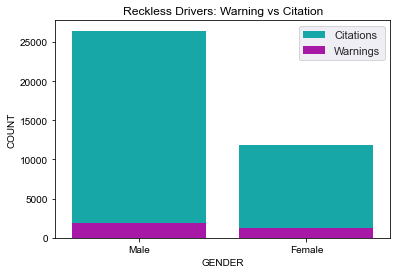

In [42]:
#Plot a graph
from matplotlib import rcParams
df = pd.DataFrame(dict(
   x=['Male', 'Female'],
   y1=[male_citations, female_citations],
   y2=[male_warnings, female_warnings]
))
bar_plot1 = sns.barplot(x='x', y='y1', data=df, label="Citations", color="c")
bar_plot2 = sns.barplot(x='x', y='y2', data=df, label="Warnings", color="m")
bar_plot1.set(xlabel='GENDER', ylabel='COUNT')
plt.title("Reckless Drivers: Warning vs Citation")
sns.set(style="darkgrid")
rcParams['figure.figsize'] = 5,5
plt.legend()
plt.show()

Q3) Who are the worst drivers based on race and gender? 

In [72]:
#Create a new dataframe where driers are male and involved in accidents
df_new_male_accident = traffic_violation_df[(traffic_violation_df['Gender'] == 'M')&(traffic_violation_df['Accident']==1)]
df_new_male_accident

SeqID  \
35       c0024b3b-44bc-45ee-995d-08de792f658b   
129      54278edb-cdf7-4f64-8c05-6d171355cb67   
177      4f60d684-c41b-4676-b7ef-f71c83a478eb   
293      aed96a63-689d-4787-90be-93c74050458f   
313      59b22ec7-e414-4bc9-8a40-04626d83a817   
...                                       ...   
1811793  4c6e4053-d457-4e1c-a0ce-e1f05690119f   
1811797  0ad14c5d-666a-4884-ad38-0a4aca668592   
1811830  795cc965-ac41-4e75-88b2-5c45d33de9d3   
1811912  14fbd620-9ce6-457a-a285-743de77eda56   
1811941  3c6e4348-117e-4c57-a6da-fbdf7adb382d   

               Make  \
35           TOYOTA   
129            FORD   
177       CHEVROLET   
293          TOYOTA   
313      VOLKSWAGEN   
...             ...   
1811793         GMC   
1811797    MERCEDES   
1811830        FORD   
1811912        FORD   
1811941      SUBARU   

          Model  \
35        SCION   
129        E250   
177      MALIBU   
293       CAMRY   
313       JETTA   
...         ...   
1811793  SIERRA   
1811797      2S   
1811830    F250   
1811912   FOCUS   
1811941  LEGACY   

                   VehicleType  \
35             02 - Automobile   
129            02 - Automobile   
177            02 - Automobile   
293            02 - Automobile   
313            02 - Automobile   
...                        ...   
1811793        02 - Automobile   
1811797        02 - Automobile   
1811830  06 - Heavy Duty Truck   
1811912        02 - Automobile   
1811941        02 - Automobile   

             Race  \
35       HISPANIC   
129      HISPANIC   
177         OTHER   
293      HISPANIC   
313         WHITE   
...           ...   
1811793     WHITE   
1811797     WHITE   
1811830  HISPANIC   
1811912     WHITE   
1811941     WHITE   

         Accident  \
35              1   
129             1   
177             1   
293             1   
313             1   
...           ...   
1811793         1   
1811797         1   
1811830         1   
1811912         1   
1811941         1   

        Fatal  \
35         No   
129        No   
177        No   
293        No   
313        No   
...       ...   
1811793    No   
1811797    No   
1811830    No   
1811912    No   
1811941    No   

                                               Description  \
35       DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...   
129      DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...   
177                    KNOWINGLY DRIVING UNINSURED VEHICLE   
293                 DRIVING VEH. WHILE IMPAIRED BY ALCOHOL   
313      DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...   
...                                                    ...   
1811793  FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...   
1811797                  DRIVER CHANGING LANES WHEN UNSAFE   
1811830  DRIVER FAILURE TO STOP AT INTERSECTION HWY. ST...   
1811912  DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...   
1811941  DRIVER FAILURE TO YIELD RIGHT OF WAY ENTERING ...   

        Gender  \
35           M   
129          M   
177          M   
293          M   
313          M   
...        ...   
1811793      M   
1811797      M   
1811830      M   
1811912      M   
1811941      M   

        Date Of Stop  \
35        08/12/2019   
129       02/10/2022   
177       07/26/2021   
293       11/07/2021   
313       11/06/2021   
...              ...   
1811793   10/13/2022   
1811797   10/12/2022   
1811830   10/13/2022   
1811912   10/12/2022   
1811941   10/12/2022   

         ...  \
35       ...   
129      ...   
177      ...   
293      ...   
313      ...   
...      ...   
1811793  ...   
1811797  ...   
1811830  ...   
1811912  ...   
1811941  ...   

        Driver State  \
35                MD   
129               VA   
177               MD   
293               MD   
313               MD   
...              ...   
1811793           MD   
1811797           MD   
1811830           MD   
1811912           MD   
1811941           MD   

         Personal Injury  \
35                     0   
129                    0   
177     

Now we are taking the max race and max people in the gender which is white race and male gender respectively, so we are creating a new dataframe which has male people who have made accidents and now we will want to find out how many of those male people are white in comparison to other races.

In [44]:
#Counting males who are white and converting to percentage
no_of_rows_male_white=len(df_new_male_accident.index)

count_male_white=(df_new_male_accident['Race']=='WHITE').sum()
male_white_percentage=(count_male_white/no_of_rows_male_white)*100
print(f'Frequency of male gender who is of white race to cause an accident is {count_male_white} which is {male_white_percentage:.2f}%')

count_male_black=(df_new_male_accident['Race']=='BLACK').sum()
male_black_percentage=(count_male_black/no_of_rows_male_white)*100
print(f'Frequency of male gender who is of black race to cause an accident is {count_male_black} which is {male_black_percentage:.2f}%')

count_male_hispanic=(df_new_male_accident['Race']=='HISPANIC').sum()
male_hispanic_percentage=(count_male_hispanic/no_of_rows_male_white)*100
print(f'Frequency of male gender who is of hispanic race to cause an accident is {count_male_hispanic} which is {male_hispanic_percentage:.2f}%')

count_male_other=(df_new_male_accident['Race']=='OTHER').sum()
male_other_percentage=(count_male_other/no_of_rows_male_white)*100
print(f'Frequency of male gender who is of other race to cause an accident is {count_male_other} which is {male_other_percentage:.2f}%')

count_male_asian=(df_new_male_accident['Race']=='ASIAN').sum()
male_asian_percentage=(count_male_asian/no_of_rows_male_white)*100
print(f'Frequency of male gender who is of asian race to cause an accident is {count_male_asian} which is {male_asian_percentage:.2f}%')

count_male_native_american=(df_new_male_accident['Race']=='NATIVE AMERICAN').sum()
male_native_american_percentage=(count_male_native_american/no_of_rows_male_white)*100
print(f'Frequency of male gender who is of native american race to cause an accident is {count_male_native_american} which is {male_native_american_percentage:.2f}%')

Frequency of male gender who is of white race to cause an accident is 9421 which is 31.74%
Frequency of male gender who is of black race to cause an accident is 7556 which is 25.46%
Frequency of male gender who is of hispanic race to cause an accident is 9799 which is 33.02%
Frequency of male gender who is of other race to cause an accident is 1500 which is 5.05%
Frequency of male gender who is of asian race to cause an accident is 1333 which is 4.49%
Frequency of male gender who is of native american race to cause an accident is 70 which is 0.24%


In [73]:
#Create a new dataframe where driers are females and involved in accidents
df_new_female_accident = traffic_violation_df[(traffic_violation_df['Gender'] == 'F')&(traffic_violation_df['Accident']==1)]
df_new_female_accident

SeqID  \
32       c546135b-e20e-4bbe-8fe2-8bddedd198d7   
174      b75ac892-b9e8-45b9-9679-1e6f151ce8a1   
178      b75ac892-b9e8-45b9-9679-1e6f151ce8a1   
189      b75ac892-b9e8-45b9-9679-1e6f151ce8a1   
191      b75ac892-b9e8-45b9-9679-1e6f151ce8a1   
...                                       ...   
1810952  a5ac587c-8bdf-424c-8efb-d902bf891ddf   
1810974  4e9af108-84af-4875-a969-39eb83242dd2   
1811214  5ec9c675-c3d3-432d-85dc-0a19482982c5   
1811334  a6e5c90c-937c-48d7-b4d0-f8236ed6c202   
1811601  3e034401-d872-4700-9907-c6d0dbe67f74   

            Make  \
32         HONDA   
174      HYUNDAI   
178      HYUNDAI   
189      HYUNDAI   
191      HYUNDAI   
...          ...   
1810952      KIA   
1810974  HYUNDAI   
1811214   NISSAN   
1811334      BMW   
1811601    HONDA   

           Model  \
32            4S   
174      ELANTRA   
178      ELANTRA   
189      ELANTRA   
191      ELANTRA   
...          ...   
1810952   OPTIMA   
1810974   SONATA   
1811214   ALTIMA   
1811334     323I   
1811601    PILOT   

             VehicleType  \
32       02 - Automobile   
174      02 - Automobile   
178      02 - Automobile   
189      02 - Automobile   
191      02 - Automobile   
...                  ...   
1810952  02 - Automobile   
1810974  02 - Automobile   
1811214  02 - Automobile   
1811334  02 - Automobile   
1811601  02 - Automobile   

             Race  \
32       HISPANIC   
174         BLACK   
178         BLACK   
189         BLACK   
191         BLACK   
...           ...   
1810952     BLACK   
1810974     WHITE   
1811214     BLACK   
1811334  HISPANIC   
1811601  HISPANIC   

         Accident  \
32              1   
174             1   
178             1   
189             1   
191             1   
...           ...   
1810952         1   
1810974         1   
1811214         1   
1811334         1   
1811601         1   

        Fatal  \
32         No   
174        No   
178        No   
189        No   
191        No   
...       ...   
1810952    No   
1810974    No   
1811214    No   
1811334    No   
1811601    No   

                                               Description  \
32       DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...   
174                    KNOWINGLY DRIVING UNINSURED VEHICLE   
178      DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
189      NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
191      RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...   
...                                                    ...   
1810952  DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...   
1810974  FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
1811214  NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
1811334  FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
1811601  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   

        Gender  \
32           F   
174          F   
178          F   
189          F   
191          F   
...        ...   
1810952      F   
1810974      F   
1811214      F   
1811334      F   
1811601      F   

        Date Of Stop  \
32        08/12/2019   
174       07/26/2021   
178       07/26/2021   
189       07/26/2021   
191       07/26/2021   
...              ...   
1810952   10/09/2022   
1810974   10/07/2022   
1811214   10/09/2022   
1811334   10/11/2022   
1811601   10/11/2022   

         ...  \
32       ...   
174      ...   
178      ...   
189      ...   
191      ...   
...      ...   
1810952  ...   
1810974  ...   
1811214  ...   
1811334  ...   
1811601  ...   

        Driver State  \
32                MD   
174               MD   
178               MD   
189               MD   
191               MD   
...              ...   
1810952           MD   
1810974           MD   
1811214           VA   
1811334           MD   
1811601           MD   

         Personal Injury  \
32                     0   
174                    0   
178                    0   
189                    0   
191                    0   
...                 

In [46]:
#Counting males who are white and converting to percentage
no_of_rows_female_white=len(df_new_female_accident.index)

count_female_white=(df_new_female_accident['Race']=='WHITE').sum()
female_white_percentage=(count_female_white/no_of_rows_female_white)*100
print(f'Frequency of female gender who is of white race to cause an accident is {count_female_white} which is {female_white_percentage:.2f}%')

count_female_black=(df_new_female_accident['Race']=='BLACK').sum()
female_black_percentage=(count_female_black/no_of_rows_female_white)*100
print(f'Frequency of female gender who is of black race to cause an accident is {count_female_black} which is {female_black_percentage:.2f}%')

count_female_hispanic=(df_new_female_accident['Race']=='HISPANIC').sum()
female_hispanic_percentage=(count_female_hispanic/no_of_rows_female_white)*100
print(f'Frequency of female gender who is of hispanic race to cause an accident is {count_female_hispanic} which is {female_hispanic_percentage:.2f}%')

count_female_other=(df_new_female_accident['Race']=='OTHER').sum()
female_other_percentage=(count_female_other/no_of_rows_female_white)*100
print(f'Frequency of female gender who is of other race to cause an accident is {count_female_other} which is {female_other_percentage:.2f}%')

count_female_asian=(df_new_female_accident['Race']=='ASIAN').sum()
female_asian_percentage=(count_female_asian/no_of_rows_female_white)*100
print(f'Frequency of female gender who is of asian race to cause an accident is {count_female_asian} which is {female_asian_percentage:.2f}%')

count_female_native_american=(df_new_female_accident['Race']=='NATIVE AMERICAN').sum()
female_native_american_percentage=(count_female_native_american/no_of_rows_female_white)*100
print(f'Frequency of female gender who is of native american race to cause an accident is {count_female_native_american} which is {female_native_american_percentage:.2f}%')

Frequency of female gender who is of white race to cause an accident is 5549 which is 41.27%
Frequency of female gender who is of black race to cause an accident is 3484 which is 25.91%
Frequency of female gender who is of hispanic race to cause an accident is 2546 which is 18.93%
Frequency of female gender who is of other race to cause an accident is 809 which is 6.02%
Frequency of female gender who is of asian race to cause an accident is 1041 which is 7.74%
Frequency of female gender who is of native american race to cause an accident is 18 which is 0.13%


So now we can see that male people are 31.74%

In [47]:
#Initialize a list with all unique races
data = traffic_violation_df['Race'].unique()
  
#Create a DataFrame with count of accidents by race and gender
new_df = pd.DataFrame(data, columns=['Race'])
count_accidents_made_by_males = [count_male_black, count_male_white, count_male_hispanic, count_male_other, count_male_asian, count_male_native_american]
count_accidents_made_by_females = [count_female_black , count_male_white,  count_female_hispanic, count_female_other, count_female_asian, count_female_native_american]
new_df ['Count_Male_Accidents'] = count_accidents_made_by_males
new_df ['Count_Female_Accidents'] = count_accidents_made_by_females
# Create a pivot table to display the data
new_df_pivot = pd.pivot_table(new_df, values = ['Count_Male_Accidents', 'Count_Female_Accidents'], columns = 'Race')
new_df_pivot

Race                    ASIAN  \
Count_Female_Accidents   1041   
Count_Male_Accidents     1333   

Race                    BLACK  \
Count_Female_Accidents   3484   
Count_Male_Accidents     7556   

Race                    HISPANIC  \
Count_Female_Accidents      2546   
Count_Male_Accidents        9799   

Race                    NATIVE AMERICAN  \
Count_Female_Accidents               18   
Count_Male_Accidents                 70   

Race                    OTHER  \
Count_Female_Accidents    809   
Count_Male_Accidents     1500   

Race                    WHITE  
Count_Female_Accidents   9421  
Count_Male_Accidents     9421

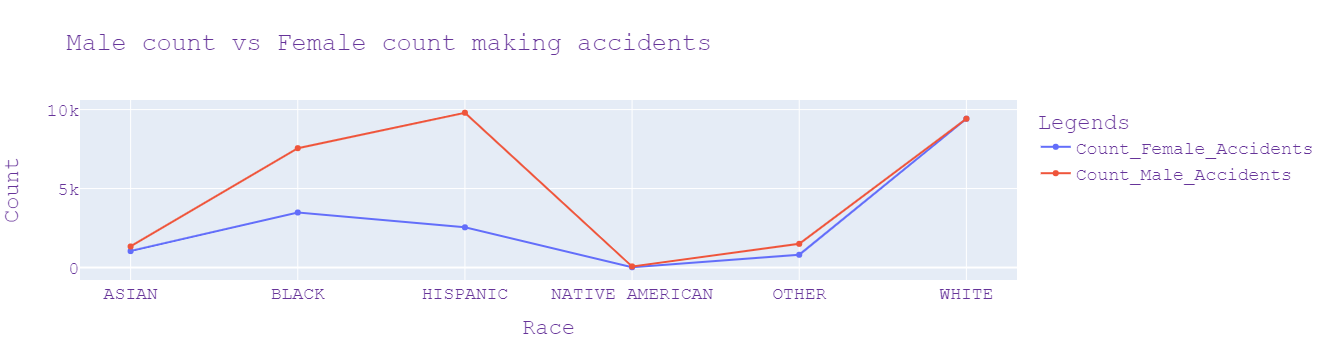

In [75]:
#Create a line chart to visualize this data
import plotly.offline as pyo
layout = go.Layout(title = 'Male count vs Female count making accidents')

traces =[go.Scatter(
    x = new_df_pivot.columns,
    y= new_df_pivot.loc[rowname],
    mode = 'markers+lines',
    name = rowname
)for rowname in new_df_pivot.index]

figure = go.Figure (data = traces, layout=layout)
figure.update_layout(
    xaxis_title="Race",
    yaxis_title="Count",
    legend_title="Legends",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

figure.show()

Q4) Predicting for a given set of vehicles will it cause an accident or not (using ML).

In [51]:
#Define the dependent and independent variables
X = traffic_violation_df[['Race', 'Gender', 'State', 'Year', 'Make', 'DL State']]
y= traffic_violation_df['Accident']

We take Accident as the dependent variable and all the variables in X as the dependent variables. We use X to predict y(if that person in X will cause an accident or not)

Since ML model cant handle text, we have to map all to some integers. So in gender, we map all males to 2 and all females to 1. All unknowns become 0

In [52]:
#Map the genders to numeric values
gender_categories = {"M": 2, "F": 1, "U":0}
X['Gender']= X['Gender'].map(gender_categories)

Similarily map the races

In [54]:
#Map the races to numeric values
race_categories = {"BLACK": 0, 'WHITE':1, "HISPANIC": 2, "ASIAN":3, 'NATIVE AMERICAN':4 , 'OTHER':5}
X['Race']= X['Race'].map(race_categories)

Map all the maryland drivers to the number 1. Since no other state is mentioned in the dictionary categories, all the other states will become NaN by default

In [55]:
#Map the states to numeric values
state_categories = {"MD": 1}
X['State']= X['State'].map(state_categories)
X['DL State']= X['DL State'].map(state_categories)

In [56]:
X['Make'].value_counts().head(10)

TOYOTA       296795
HONDA        248882
FORD         154847
NISSAN       128866
CHEVROLET    124063
HYUNDAI       58716
DODGE         55396
ACURA         51539
MERCEDES      49561
BMW           46946
Name: Make, dtype: int64

Map the car brands. It is not possible to map all, so we do it ony for the top 10. Hridyansh to expand this to 15/20

In [57]:
#Map the vehicle make to numeric values
make_categories = {"TOYOTA": 1, 'HONDA':2, 'FORD': 3, 'NISSAN':4, 'CHEVROLET': 5, 'HYUNDAI':6,'DODGE':7, 'ACURA':8, 'MERCEDES':9, 'BMW':10}
X['Make']= X['Make'].map(make_categories)

ML models cant handle NaN as well. So we convert all NaNs to 0 in Make, State and DL state. But converting blank years to 0 will confuse the models since all the values are in the range 1900-2020. Hence we fill the NaN years with mean of years

In [59]:
#Fill in the missing values
X['Make'] = X['Make'].fillna(0)
X['State']= X['State'].fillna(0)
X['DL State']= X['DL State'].fillna(0)
X['Year']= X['Year'].fillna(X['Year'].mean())

Split the dataset into test and train data. 70% data will be used for training and the rest 30 for testing

In [60]:
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Initialize the algorithm

In [61]:
#Initialize the ML algorithm
forest = RandomForestClassifier(n_estimators=10)

Fit the model with training values

In [62]:
#Fit the training data into the ML Model
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

Using the X values from test, predict y values and store it in y_pred

In [63]:
#Predict the output
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Now compare the predicted y values and the values that we already had. 97.3% of the values match

In [64]:
#Calculate the accuracy of our model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.974


In [65]:
#Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[492720,    113],
       [ 12820,    130]], dtype=int64)

In [68]:
#Find the output of our model based on a given set of inputs

race = 'HISPANIC'
gender = 'M'
state = 'MD'
year = '2018'
make = 'TOYOTA'
dl_state = 'MD'
test_data = []

race_map = {"BLACK": 0, 'WHITE':1, "HISPANIC": 2, "ASIAN":3, 'NATIVE AMERICAN':4 , 'OTHER':5}
if race in race_map.keys():
    test_data.append(race_map[race])

gender_map = {"M": 2, "F": 1, "U":0}
if gender in gender_map.keys():
    test_data.append(gender_map[gender])


state_map = {"MD": 1}
if state in state_map.keys():
    test_data.append(state_map[state])
else:
    test_data.append(0)

test_data.append(year)
    
if dl_state in state_map.keys():
    test_data.append(state_map[dl_state])
else:
    test_data.append(0)

model_map = {"TOYOTA": 1, 'HONDA':2, 'FORD': 3, 'NISSAN':4, 'CHEVROLET': 5, 'HYUNDAI':6,'DODGE':7, 'ACURA':8, 'MERCEDES':9, 'BMW':10}
if make in model_map.keys():
    test_data.append(model_map[make])
else:
    test_data.append(0)
    
y_pred = forest.predict([test_data])

gender_map = {"M": "Male", "F": "Female", "U":"Unknown"}
if gender in gender_map.keys():
    gender = gender_map[gender]
    
accident_map = {0: " not", 1: ""}
decision = accident_map[y_pred[0]]

print(f'When a {gender}, {race} driver from {state} with their driving licence state from {dl_state} is driving a {year} model {make}, the driver is{decision} likely to cause an accident')

When a Male, HISPANIC driver from MD with their driving licence state from MD is driving a 2018 model TOYOTA, the driver is not likely to cause an accident


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

